In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Multiply, Input
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
import os


import pickle
with open('dataset.pkl','rb') as f:
    X_train, X_val, y_train, y_val = pickle.load(f) #the one computed in the previous blocks
    
# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.pkl'

In [61]:
base_model.layers[-1]

# VGG16 con 100 epoche


In [ ]:

img_height = 224
img_width = 224
num_classes=y_val.shape[-1]

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))

for layer in base_model.layers:
#     print(layer.name)
    layer.trainable = False

# ########### OK ###########
# x = tf.keras.layers.GlobalMaxPooling2D()(base_model.output)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


# ########################## Attention on last VGG layer
# attention = Dense(32, activation='relu')(base_model.output)
# attention = Dense(1, activation='tanh')(attention)
# x = Multiply()([base_model.output, attention])
# x = tf.keras.layers.GlobalMaxPooling2D()(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


########################## Attention on last VGG layer
k = 6
inp = base_model.layers[-k].output #place attention before the kth last layer

attention = Dense(32, activation='relu')(inp)
attention = Dense(1, activation='sigmoid')(attention)
x = Multiply()([inp, attention])

for layer in base_model.layers[-k:]: #attach last k layers
    x = layer(x)
#     layer.trainable = True

#classification
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


# attention = GlobalAveragePooling2D()(attention)
# attention = Multiply()([base_model.output, attention])

# # Add the top classification layer by applying a dense layer with a tanh activation function, followed by global average pooling and element-wise multiplication.
# output = GlobalAveragePooling2D()(attention)
# # Use global average pooling and a dense layer with softmax activation for multi-class classification.
# output = Dense(num_classes, activation='softmax')(output)

def custom_loss(y_true, y_pred):
    return 1e-4*tf.keras.backend.mean(y_pred)


# # Create the model
model = Model(inputs=base_model.input, outputs=[output,attention])
# model = Model(inputs=base_model.input, outputs=output)

# # Compile the model
model.compile(optimizer='adam', loss=['categorical_crossentropy',custom_loss], metrics=[['accuracy'],[None]])
# model.add_loss(MyLoss(true1, true2, output1, output2, output3))
# model.compile(optimizer='adam')

# Train the model
history_100 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

# Save the trained model
model.save('./image_classification_model_100.h5')


Epoch 1/100
31/31 [==============================] - 8s 187ms/step - loss: 1.1916 - dense_241_loss: 1.1916 - dense_239_loss: 1.3185e-05 - dense_241_accuracy: 0.3428 - val_loss: 1.0947 - val_dense_241_loss: 1.0947 - val_dense_239_loss: 2.1174e-06 - val_dense_241_accuracy: 0.3136
Epoch 2/100
31/31 [==============================] - 4s 146ms/step - loss: 1.1198 - dense_241_loss: 1.1198 - dense_239_loss: 2.8324e-06 - dense_241_accuracy: 0.3565 - val_loss: 1.0641 - val_dense_241_loss: 1.0641 - val_dense_239_loss: 3.9712e-06 - val_dense_241_accuracy: 0.4460
Epoch 3/100
31/31 [==============================] - 5s 148ms/step - loss: 1.0440 - dense_241_loss: 1.0440 - dense_239_loss: 3.4378e-06 - dense_241_accuracy: 0.4532 - val_loss: 1.0013 - val_dense_241_loss: 1.0013 - val_dense_239_loss: 3.6473e-06 - val_dense_241_accuracy: 0.4725
Epoch 4/100
31/31 [==============================] - 5s 148ms/step - loss: 0.9538 - dense_241_loss: 0.9538 - dense_239_loss: 3.3140e-06 - dense_241_accuracy: 0.548

KeyboardInterrupt: 

In [14]:
model.predict(X_val[0:1])

1/1 [==============================] - 0s 41ms/step


array([[1.2494529e-05, 4.0744626e-06, 9.9998343e-01]], dtype=float32)

(28, 28)


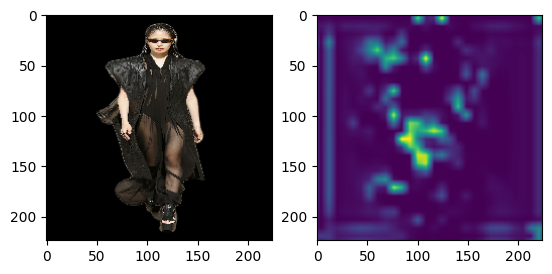

(28, 28)


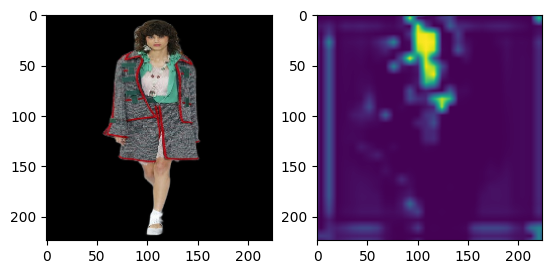

(28, 28)


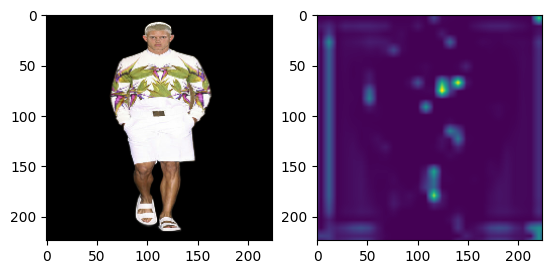

(28, 28)


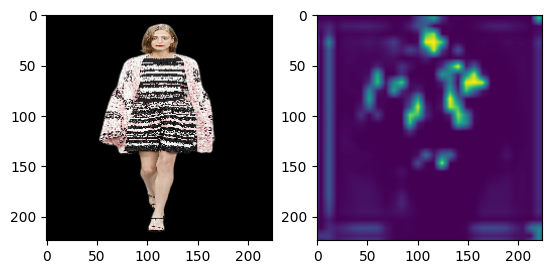

(28, 28)


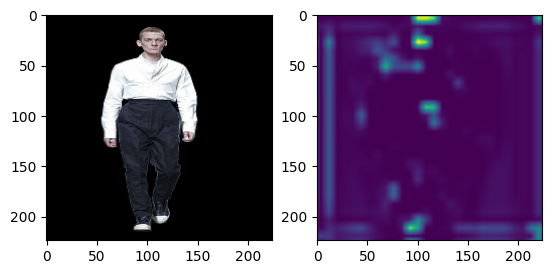

(28, 28)


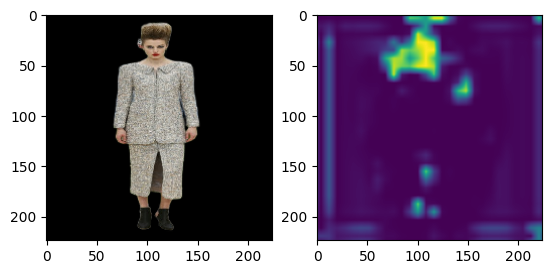

(28, 28)


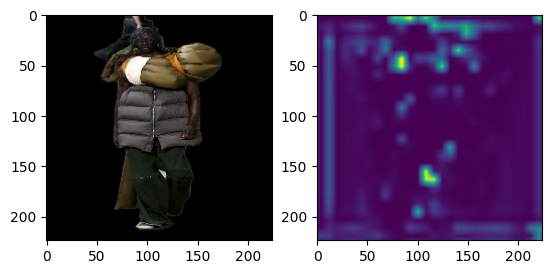

(28, 28)


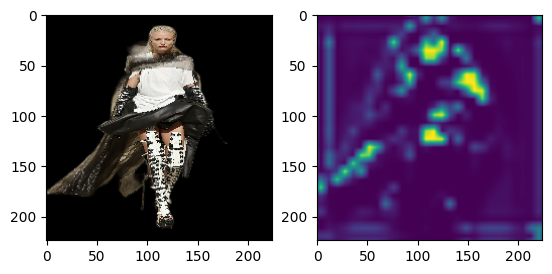

(28, 28)


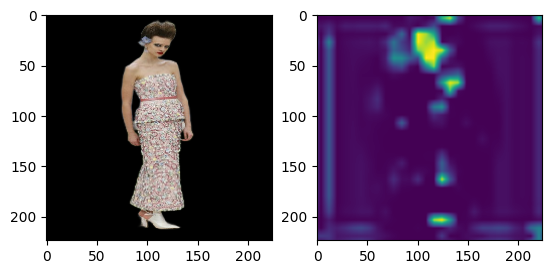

(28, 28)


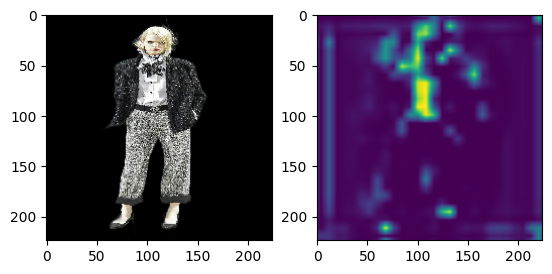

In [122]:
# attention
import matplotlib.pyplot as plt
import skimage


for img in X_val[:10]:

    A = Model(inputs=base_model.input, outputs=attention)(img[None,...])[0,:,:,0].numpy()
    print(A.shape)
    A = skimage.transform.resize(A,(224,224))


    fig, axs = plt.subplots(1,2)
    axs[0].imshow(img)
    axs[1].imshow(A)
    plt.show()

In [5]:
# write a loop to iterate all the number from 0 to 100 and return a list of numbers which are divided by 2 and 3
divided = []
for i in range(100):
    if i%2==0 and i%3==0:
        divided.append(i)
print(divided)
                

[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96]
